## Automobile Price Prediction 

### Workflow:
<ul>
    <li> Loading data </li>
    <li> Preprocessing data </li>
    <li> Exploring individual variables </li>
    <li> Multivariate analysis </li>
    <li> Modelling: Linear Regression </li>
    <li> Evaluate and refine model predictions </li>
</ul>

#### Imports

In [27]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

# set the default style 
plt.style.use('ggplot')
blue= '#00688B'

# set default figure size
plt.rcParams['figure.figsize'] = (10, 8)

### 0. Loading data

In [2]:
df= pd.read_csv('autos.csv', encoding='latin-1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### 1. Preprocessing data 
#### 1.1 Data Translation 
The dataset we'll be working with is in German, and we'll need to convert the columns and values to English, which appears to be possible with Google Translate. Our approach would be so straightforward that it could be expressed in the following steps:

<ol>
    <li> Looking at the unique values of a column, identify its English translation </li>
    <li> Substitute German text with English text </li>
</ol>

That is how we interpret our *categorical columns*.

In [3]:
# OfferType 
print(df.offerType.unique())
df.offerType.replace({'Angebot': 'offer', 'Gesuch': 'request'}, inplace= True)
print(df.offerType.unique())

# vehicleType
print(df.vehicleType.unique())
df.vehicleType.replace({'kleinwagen': 'small car', 'kombi': 'estate',
                        'cabrio': 'convertible','andere': 'other' }, inplace= True)

# gearbox
print(df.gearbox.unique())
df.gearbox.replace({'manuell': 'manual', 'automatik': 'automatic'}, inplace= True)

# fuel type
print(df.fuelType.unique())
df.fuelType.rename({'benzin': 'petrol', 'elektro': 'electric', 'andere': 'other'}, inplace= True)

# Seller
print(df.seller.unique())
df.seller.replace({'privat': 'private', 'gewerblich': 'commercial'}, inplace= True)

# notRepairedDamage
print(df.notRepairedDamage.unique())
df.notRepairedDamage.replace({'nein':'no', 'ja': 'yes'}, inplace= True)

# brand
print(df.brand.unique())
df.brand.replace({'sonstige_autos': 'other'}, inplace= True) 

['Angebot' 'Gesuch']
['offer' 'request']
['bus' 'limousine' 'kleinwagen' 'kombi' nan 'coupe' 'suv' 'cabrio'
 'andere']
['manuell' 'automatik' nan]
['lpg' 'benzin' 'diesel' nan 'cng' 'hybrid' 'elektro' 'andere']
['privat' 'gewerblich']
['nein' nan 'ja']
['peugeot' 'bmw' 'volkswagen' 'smart' 'ford' 'chrysler' 'seat' 'renault'
 'mercedes_benz' 'audi' 'sonstige_autos' 'opel' 'mazda' 'porsche' 'mini'
 'toyota' 'dacia' 'nissan' 'jeep' 'saab' 'volvo' 'mitsubishi' 'jaguar'
 'fiat' 'skoda' 'subaru' 'kia' 'citroen' 'chevrolet' 'hyundai' 'honda'
 'daewoo' 'suzuki' 'trabant' 'land_rover' 'alfa_romeo' 'lada' 'rover'
 'daihatsu' 'lancia']


#### 1.2 Data Cleaning 
At this step, we will split columns and maintain only the useful parts, drop some columns, and change the data type for others.

In [4]:
# Price
df.price = df.price.str.replace('[\$,]', '').astype(float)

# Mileage or odometer
df.odometer = df.odometer.str.replace('km|,', '').astype(int)

# dateCrawled
df.dateCrawled= pd.to_datetime(df.dateCrawled)

C:\Users\pc\AppData\Local\Temp\ipykernel_18700\1787847211.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.price = df.price.str.replace('[\$,]', '').astype(float)
C:\Users\pc\AppData\Local\Temp\ipykernel_18700\1787847211.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.odometer = df.odometer.str.replace('km|,', '').astype(int)


In [5]:
df.price

0         5000.0
1         8500.0
2         8990.0
3         4350.0
4         1350.0
          ...   
49995    24900.0
49996     1980.0
49997    13200.0
49998    22900.0
49999     1250.0
Name: price, Length: 50000, dtype: float64

In [6]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,private,offer,5000.0,control,bus,2004,manual,158,andere,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,private,offer,8500.0,control,limousine,1997,automatic,286,7er,150000,6,benzin,bmw,no,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,private,offer,8990.0,test,limousine,2009,manual,102,golf,70000,7,benzin,volkswagen,no,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,private,offer,4350.0,control,small car,2007,automatic,71,fortwo,70000,6,benzin,smart,no,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,private,offer,1350.0,test,estate,2003,manual,0,focus,150000,7,benzin,ford,no,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## 2. Exploring individual variables
### 2.1 Price

In [7]:
df.price.describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

When we attempt to evaluate the price column summary above, we must remember that the presence of outliers in the column may alter the summary statistics, and additional cleaning may be required. According to the summary, car prices have risen to more than 2.10[9]! Which is simply incorrect. That is why when we look into vehicles costing more over €100,000, we find patterns cuch '11111' or '999999'. That's why in ou cleannig approach we will keep cars with priceover €150,000 only if they're convertibles or SUV while dropping any car with a price over €200,000

In [8]:
# false patters 
df[df['price']>= 100000].head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
514,2016-03-17 09:53:08,Ford_Focus_Turnier_1.6_16V_Style,private,offer,999999.0,test,estate,2009,manual,101,focus,125000,4,benzin,ford,no,2016-03-17 00:00:00,0,12205,2016-04-06 07:17:35
1878,2016-03-12 16:58:37,Porsche_911_Turbo,private,offer,129000.0,control,coupe,1995,manual,408,911,125000,9,benzin,porsche,no,2016-03-12 00:00:00,0,70180,2016-04-05 04:49:19
2454,2016-03-21 22:51:29,Porsche_911_GT3,private,offer,137999.0,control,coupe,2010,manual,435,911,20000,7,benzin,porsche,no,2016-03-21 00:00:00,0,80636,2016-04-07 05:45:39
2751,2016-03-15 10:52:35,Porsche_911___993_4S,private,offer,120000.0,control,coupe,1998,manual,286,911,125000,3,benzin,porsche,no,2016-03-15 00:00:00,0,25488,2016-04-05 19:47:31
2897,2016-03-12 21:50:57,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,private,offer,11111111.0,test,limousine,1973,manual,48,escort,50000,3,benzin,ford,no,2016-03-12 00:00:00,0,94469,2016-03-12 22:45:27


In [9]:
# Resonable prices filtering 
df = df[(df['price'] <= 200000) & 
            ~((df['price'] > 100000) & 
              df['vehicleType'].isin(['limousine', 'small car', 'estate', 'bus', 'other']) )]

# Looking at cars with a price above €75000
df[df.price >= 75000].brand.unique().tolist()

['porsche',
 'land_rover',
 'renault',
 'other',
 'audi',
 'mercedes_benz',
 'bmw',
 'ford']

In an interpretation of the results we've got when filtering for cars with a price above €75K,  brands like (Ford, Renault). Let's take a clos look on this cars

In [10]:
# Examine non premium cars with a price over €75000
df[ (df['price'] > 75000) & (df['brand'].isin(['ford', 'renault']))].model

2683      andere
49815    mustang
Name: model, dtype: object

There's nothing to worry about because only two automobiles emerge, both of which are either premium or offered by collectors. Nonetheless, we will set a minimum price for an automobile that is more than €100.

In [11]:
df= df.loc[df.price >= 100]

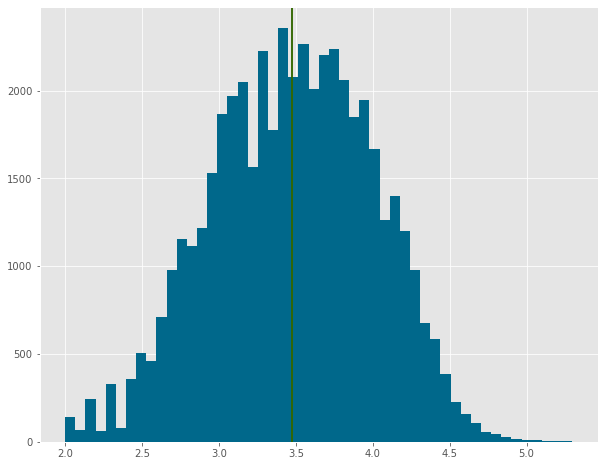

In [26]:
log_price= np.log10(df.price)
plt.hist(log_price, bins= 50, color=blue )
# median and mean vertical bars 
plt.axvline(log_price.mean(), c= 'red')
plt.axvline(log_price.median(), c= 'green')
plt.show()

The red bar represents the mean, while the blue bar represents the median. The median and mean have the same value.

We have a nearly normal distribution after the scale transformation.

### 2.2 Vehicle type 

<BarContainer object of 8 artists>

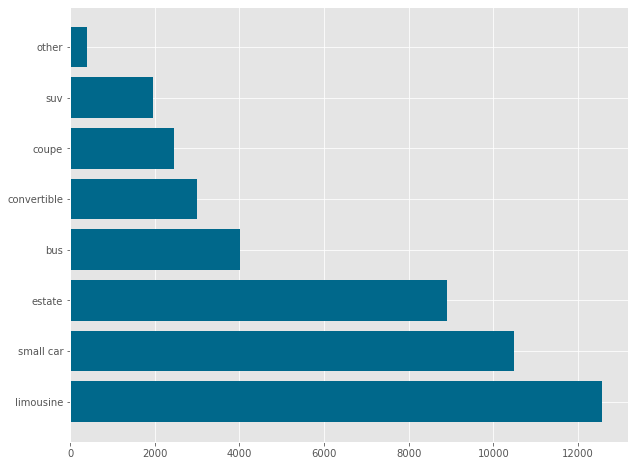

In [44]:
plt.barh(df.vehicleType.value_counts().index, df.vehicleType.value_counts().values, color= blue)

In [42]:
df.vehicleType.value_counts().values

array([12558, 10498,  8907,  4023,  3005,  2453,  1962,   388],
      dtype=int64)